In [72]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import numpy as np
from matplotlib import pyplot
from collections import OrderedDict
import cv2

train_data = torchvision.datasets.QMNIST('~/Datasets/QMNIST', train=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.QMNIST('~/Datasets/QMNIST', train=False, transform=torchvision.transforms.ToTensor())

lr = 0.1
epoch = 5
batch_size=100

data_iter = DataLoader(train_data, batch_size=batch_size, shuffle=True)


loss = nn.CrossEntropyLoss()

# for feature, label in data_iter:
#     print(feature.shape)
#     print(label)
#     break

# 返回 shape: 100(batch_size) x 784 的 tensor
class FlattenLayer(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        # 原 shape [batch_size, 1, 28, 28] 返回 [batch_size, 784]
        return x.view(x.shape[0], -1)
    

net = nn.Sequential(OrderedDict([('Flatten', FlattenLayer()), ('Linear', nn.Linear(784, 10))]))

optim = torch.optim.SGD(net.parameters(), lr=lr)


In [73]:
# 训练
for e in range(epoch):
    correct = 0
    total = 0
    for X, y in data_iter:
        y_pred = net(X)
        l = loss(y_pred, y).sum()
        l.backward()
        optim.step()
        optim.zero_grad()
        correct += (y_pred.argmax(dim=1) == y).float().sum()
        total += y.shape[0]
    print('accuracy', correct / total)
    


accuracy tensor(0.8661)
accuracy tensor(0.9012)
accuracy tensor(0.9079)
accuracy tensor(0.9114)
accuracy tensor(0.9142)


(28, 28)
result is  3


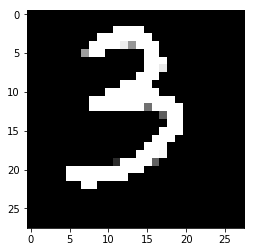

In [76]:
img = cv2.imread('./data/3.png', 0)

unloader = torchvision.transforms.ToPILImage()

r_img = cv2.resize(img, (28, 28))

print(r_img.shape) # (28, 28)

t_img = torchvision.transforms.functional.to_tensor(r_img)



pyplot.imshow(unloader(t_img), cmap="gray")


print('result is ', net(t_img.unsqueeze(0)).argmax().item())

shape torch.Size([1, 28, 28])
test[0] label is  7
predict test[0] is 7


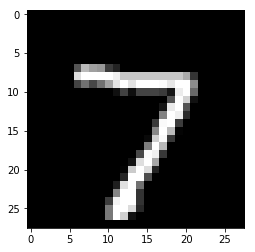

In [75]:
predict_label = test_data[0][1]
predict_data = test_data[0][0]

print('shape', predict_data.shape) # torch.Size([1, 28, 28])


pyplot.imshow(predict_data.view(28, 28), cmap="gray")

print('test[0] label is ', predict_label)
print('predict test[0] is', net(predict_data).argmax().item())